# Support Vector Machine 
#### Radial (RBF) Kernal 

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.decomposition import PCA

## Importing Data

In [2]:
df=pd.read_excel("D:/OneDrive/Desktop/Machine Learning Quest/default of credit card clients.xls",header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# changing the predicted column name
df.rename(columns={'default payment next month':'default'},inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# droping id column
df.drop(columns='ID',axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Missing Data Part 1: Indentifying Mising Data 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

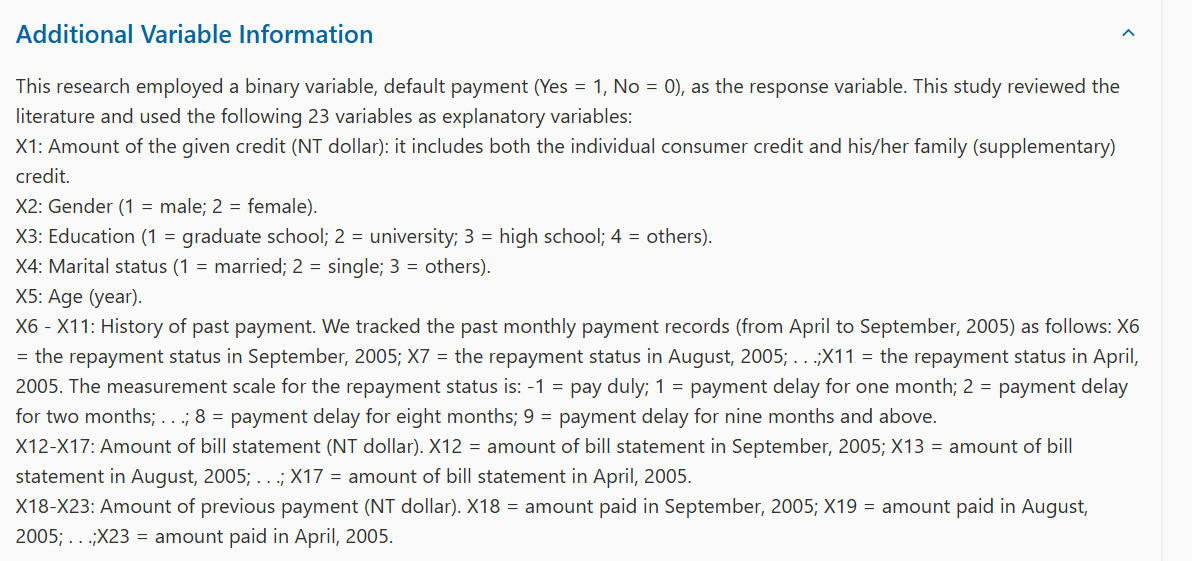

In [6]:
# Checking the values in each column
df['SEX'].unique()

array([2, 1])

In [7]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [8]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

###### Assuming that in education and marriage their are lot of values which are not given in official details so we are classifiying them as missing 

## Missing Data Part 2: Dealing With Missing Data

In [9]:
filt=((df['EDUCATION']==0) | (df['MARRIAGE']==0))
df.loc[filt]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
218,110000,2,3,0,31,0,0,0,0,0,...,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
809,160000,2,2,0,37,0,0,0,0,0,...,28574,27268,28021,35888,1325,891,1000,1098,426,0
820,200000,2,3,0,51,-1,-1,-1,-1,0,...,780,390,390,0,390,780,0,390,390,0
1019,180000,2,3,0,45,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1443,200000,1,3,0,51,-1,-1,-1,-1,0,...,2529,1036,4430,5020,9236,2529,0,4430,6398,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28602,200000,2,3,0,37,1,-1,-1,-1,-1,...,4000,22800,5716,35000,5000,4000,22800,5716,0,0
28603,110000,2,3,0,44,2,2,2,2,2,...,41476,42090,43059,2000,2000,1700,1600,1800,1800,1
28766,80000,2,3,0,40,2,2,3,2,-1,...,1375,779,5889,5000,0,0,885,5889,4239,0
29078,100000,2,3,0,56,1,2,0,0,2,...,31134,30444,32460,0,1500,2700,0,2400,0,0


###### So only 68 rows have missing value=0 in education or marriage so we are just removing them rather than imputing any value

In [10]:
len(df)

30000

###### So 68 of 30000 rows,or less that 1% caontain missing values 

In [11]:
df_no_missing=df.loc[(df['EDUCATION']!=0)&(df['MARRIAGE']!=0)]
len(df_no_missing)

29932

In [12]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [13]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3])

###### They not contain any zero

## Downsample the data

##### Support vector machine work great with small dataset but not very awesome with large datasets .This is big enough to take large time for cross validation

In [14]:
len(df_no_missing)

29932

In [15]:
df_no_defalut=df_no_missing[df_no_missing['default']==0]
df_defalut=df_no_missing[df_no_missing['default']==1]

In [16]:
df_no_defalut_downsample=resample(
    df_no_defalut,
    replace=False, # so we select a person and then we will not again put in to sample
    n_samples=1000,
    random_state=42
)
len(df_no_defalut_downsample)

1000

In [17]:
df_defalut_downsample=resample(
    df_defalut,
    replace=False, # so we select a person and then we will not again put in to sample
    n_samples=1000,
    random_state=42
)
len(df_defalut_downsample)

1000

In [18]:
df_downsmaple=pd.concat([df_defalut_downsample,df_no_defalut_downsample])

In [19]:
len(df_downsmaple)

2000

## Format Data Part 1: Split the Data into Dependent and Independent Variable

In [20]:
X=df_downsmaple.drop('default',axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19982,300000,2,1,1,47,3,2,2,2,2,...,5000,5000,5000,5000,0,0,0,0,0,0
19350,80000,2,2,2,36,2,0,0,-2,-2,...,0,0,0,0,1700,0,0,0,0,0
17057,30000,2,3,2,22,2,2,0,0,0,...,29047,29507,11609,11711,0,1687,1147,524,400,666
26996,80000,1,1,2,34,2,2,2,2,2,...,63827,64682,65614,67007,2800,3000,2500,2600,2600,2600
23621,210000,2,3,1,44,-2,-2,-2,-2,-2,...,17706,0,5646,14793,13462,17706,0,5646,14793,7376


In [21]:
y=df_downsmaple['default']
y.head()

19982    1
19350    1
17057    1
26996    1
23621    1
Name: default, dtype: int64

## Format the Data Part 2: One-Hot Encoding

In [22]:
pd.get_dummies(X,columns=['MARRIAGE'],dtype='int').head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
19982,300000,2,1,47,3,2,2,2,2,2,...,5000,0,0,0,0,0,0,1,0,0
19350,80000,2,2,36,2,0,0,-2,-2,-2,...,0,1700,0,0,0,0,0,0,1,0
17057,30000,2,3,22,2,2,0,0,0,0,...,11711,0,1687,1147,524,400,666,0,1,0
26996,80000,1,1,34,2,2,2,2,2,2,...,67007,2800,3000,2500,2600,2600,2600,0,1,0
23621,210000,2,3,44,-2,-2,-2,-2,-2,-2,...,14793,13462,17706,0,5646,14793,7376,1,0,0


In [23]:
X_encoded=pd.get_dummies(X,
                        columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],
                        dtype='int')
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
19982,300000,47,5000,5000,5000,5000,5000,5000,0,0,...,0,0,0,0,1,0,0,0,0,0
19350,80000,36,19671,20650,0,0,0,0,1700,0,...,0,1,0,0,0,0,0,0,0,0
17057,30000,22,29793,29008,29047,29507,11609,11711,0,1687,...,0,0,0,1,0,0,0,0,0,0
26996,80000,34,61231,62423,63827,64682,65614,67007,2800,3000,...,0,0,0,0,1,0,0,0,0,0
23621,210000,44,11771,13462,17706,0,5646,14793,13462,17706,...,0,1,0,0,0,0,0,0,0,0


## Format the Data Part 3: Centering and Scaling 

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

##### As we are using radial kernal in support vector machine it assume that the data we are feeding is scaled and centerd i.e mean=0 and std=1

## Build A Premliminary Support Vector Machine

In [25]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


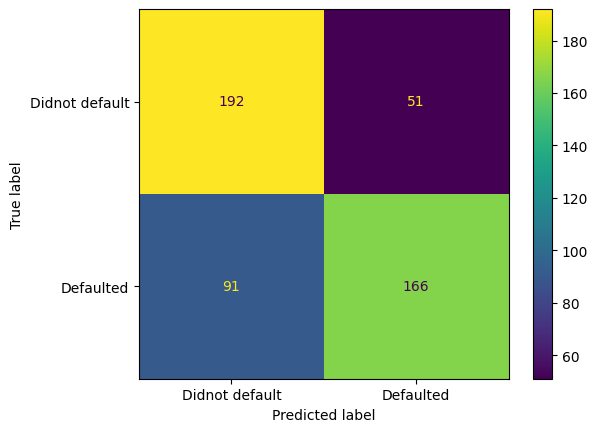

In [26]:
y_pred = clf_svm.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Didnot default','Defaulted'])
disp.plot()
plt.show()

## Optimize parameter using Cross Validation and Grid Search cv

In [27]:
param_grid=[
    {'C':[0.5,1,10,100], ## not values must be >0
    'gamma':['scale',1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']}
]

In [28]:
optimal_param=GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)
optimal_param.fit(X_train_scaled,y_train)
print(optimal_param.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


## Building Evaluting,Drawing and Interpreting the Final Support Vector Machine

In [29]:
clf_svm=SVC(random_state=42,C=100,gamma=0.001,kernel='rbf')
clf_svm.fit(X_train_scaled,y_train)

,C,100
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


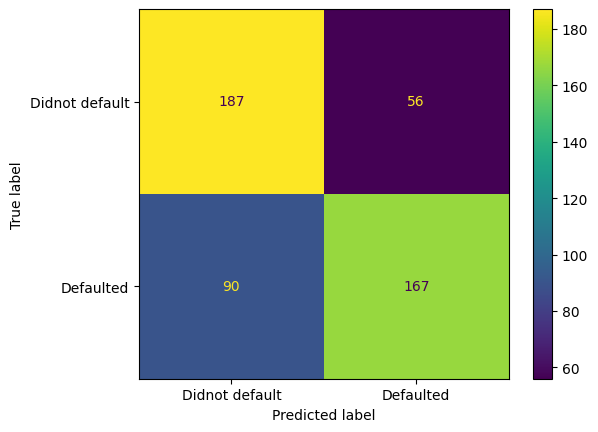

In [30]:
y_pred = clf_svm.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Didnot default','Defaulted'])
disp.plot()
plt.show()

In [31]:
len(df_downsmaple.columns)

24

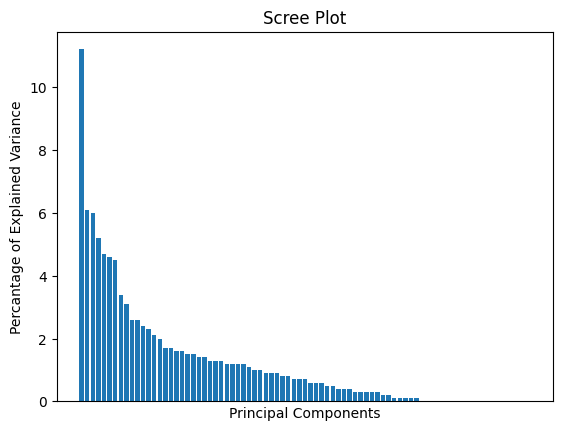

In [32]:
pca=PCA()
x_train_pca=pca.fit_transform(X_train_scaled)
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=[str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False
)
plt.ylabel('Percantage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

##### Here what had happned the first has highest ratio but the second and third had approximately same 

In [34]:
x_train_pca[:,0]

array([ 3.74028815,  7.68573426, -1.69943917, ..., -0.33861524,
       -3.58547732,  0.63083467], shape=(1500,))

In [52]:
# getting new coordinate of x i.e for the first to bar 
pca1_train_coord=x_train_pca[:,0]
pca2_train_coord=x_train_pca[:,1]

#New center and scaled data
pca_train_scaled=scale(np.column_stack([pca1_train_coord,pca2_train_coord]))

# parameter grid for Grid serach cross validation
param_grid=[
    {'C':[1,10,100,1000], ## not values must be >0
    'gamma':['scale',1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']}
]
#Training gridsearchcv
optimal_param=GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)
optimal_param.fit(pca_train_scaled,y_train)
print(optimal_param.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [47]:
clf_svm=SVC(random_state=42,C=100,gamma='scale',kernel='rbf')
clf_svm.fit(pca_train_scaled,y_train)

,C,100
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


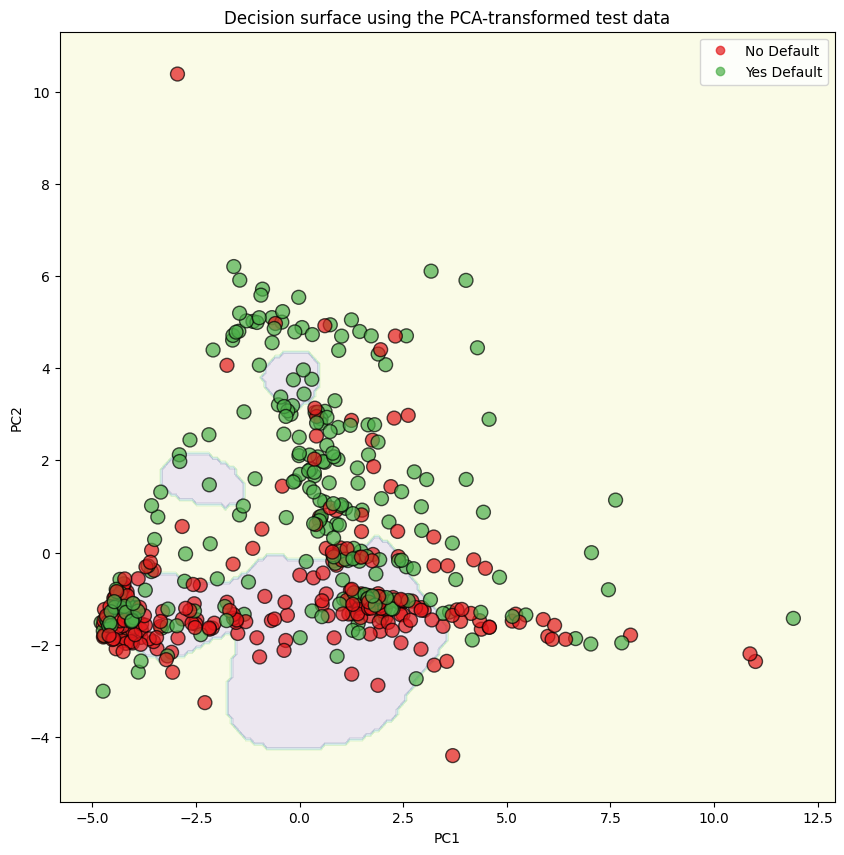

In [53]:
# Transform test dataset (use X_test_scaled here)
x_test_pca = pca.transform(X_test_scaled)
test_pca1_coord = x_test_pca[:, 0]
test_pca2_coord = x_test_pca[:, 1]

# Create the plot decision boundary
x_min = test_pca1_coord.min() - 1
x_max = test_pca1_coord.max() + 1
y_min = test_pca2_coord.min() - 1
y_max = test_pca2_coord.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

z = clf_svm.predict(np.column_stack([xx.ravel(), yy.ravel()]))
z = z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, z, alpha=0.1)

# Scatter plot with true labels
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
scatter = ax.scatter(test_pca1_coord, test_pca2_coord, c=y_test,
                     cmap=cmap,
                     s=100,
                     edgecolors='k',
                     alpha=0.7)

# Create legend
legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                   loc="upper right")
legend.get_texts()[0].set_text("No Default")
legend.get_texts()[1].set_text("Yes Default")

# Labels and title
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
ax.set_title("Decision surface using the PCA-transformed test data")
plt.show()
